#### Example 7 - Refining a triangulation


We have seen how the standard meshes can be uniformly refined to finer resolution. The routines used for this task are available to the `stripy` user for non-uniform refinement as well. 


#### Notebook contents

   - [Uniform meshes](#Uniform-meshes-by-refinement)
   - [Refinement strategies](#Refinement-strategies)
   - [Visualisation](#Visualisation-of-refinement-strategies)
   - [Targetted refinement](#Targetted-refinement)
   - [Visualisation](#Visualisation-of-targetted-refinement)


   

In [1]:
import stripy as stripy
import numpy as np

xmin = 0.0
xmax = 10.0
ymin = 0.0
ymax = 10.0
extent = [xmin, xmax, ymin, ymax]

spacingX = 0.5
spacingY = 0.5

### Uniform meshes by refinement

The `refinement_level` parameter of the `stripy` meshes makes repeated loops determining the bisection points of all the existing edges in the triangulation and then creating a new triangulation that includes these points and the original ones. These refinement operations can also be used for non-uniform refinement. 

In [2]:
ellip0 = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=0)
ellip1 = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=1)
ellip2 = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=2)
ellip3 = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=3)
ellip4 = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=4)
ellip5 = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=5)
ellip6 = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=6)
ellip7 = stripy.cartesian_meshes.elliptical_mesh(extent, spacingX, spacingY, refinement_levels=7)

print("Size of mesh - 1  {}".format(ellip1.points.shape[0]))
print("Size of mesh - 2  {}".format(ellip2.points.shape[0]))
print("Size of mesh - 3  {}".format(ellip3.points.shape[0]))
print("Size of mesh - 4  {}".format(ellip4.points.shape[0]))
print("Size of mesh - 5  {}".format(ellip5.points.shape[0]))
print("Size of mesh - 6  {}".format(ellip6.points.shape[0]))
print("Size of mesh - 7  {}".format(ellip7.points.shape[0]))


Size of mesh - 1  253
Size of mesh - 2  739
Size of mesh - 3  2197
Size of mesh - 4  6571
Size of mesh - 5  19693
Size of mesh - 6  59059
Size of mesh - 7  177157


### Refinement strategies

Five refinement strategies:

   - Bisect all segments connected to a given node
   - Refine all triangles connected to a given node by adding a point at the centroid or bisecting all edges
   - Refine a given triangle by adding a point at the centroid or bisecting all edges
   
These are provided as follows:

In [3]:

mx, my = ellip2.midpoint_refine_triangulation_by_vertices(vertices=[1,2,3,4,5,6,7,8,9,10])
ellip2mv = stripy.Triangulation(mx, my)

mx, my = ellip2.edge_refine_triangulation_by_vertices(vertices=[1,2,3,4,5,6,7,8,9,10])
ellip2ev = stripy.Triangulation(mx, my)

mx, my = ellip2.centroid_refine_triangulation_by_vertices(vertices=[1,2,3,4,5,6,7,8,9,10])
ellip2cv = stripy.Triangulation(mx, my)

mx, my = ellip2.edge_refine_triangulation_by_triangles(triangles=[1,2,3,4,5,6,7,8,9,10])
ellip2et = stripy.Triangulation(mx, my)

mx, my = ellip2.centroid_refine_triangulation_by_triangles(triangles=[1,2,3,4,5,6,7,8,9,10])
ellip2ct = stripy.Triangulation(mx, my)


str_fmt = "refinement --- {} points, {} simplices"
print(str_fmt.format(ellip2mv.npoints, ellip2mv.simplices.shape[0]))
print(str_fmt.format(ellip2ev.npoints, ellip2ev.simplices.shape[0]))
print(str_fmt.format(ellip2cv.npoints, ellip2cv.simplices.shape[0]))
print(str_fmt.format(ellip2et.npoints, ellip2et.simplices.shape[0]))
print(str_fmt.format(ellip2ct.npoints, ellip2ct.simplices.shape[0]))


refinement --- 795 points, 1570 simplices
refinement --- 849 points, 1678 simplices
refinement --- 795 points, 1570 simplices
refinement --- 760 points, 1500 simplices
refinement --- 749 points, 1478 simplices


### Visualisation of refinement strategies


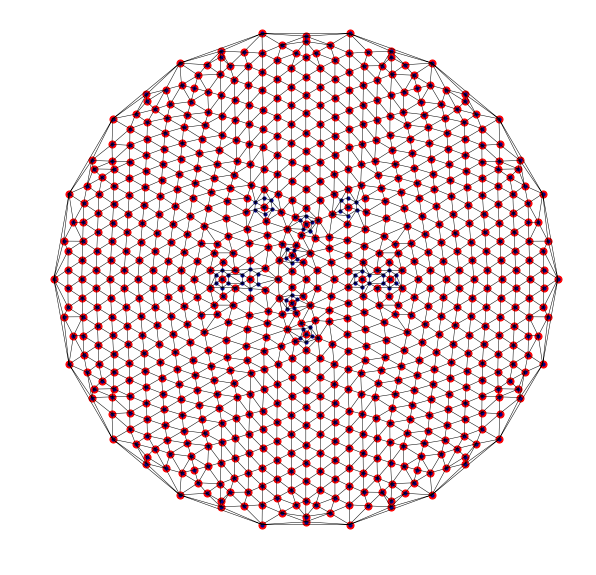

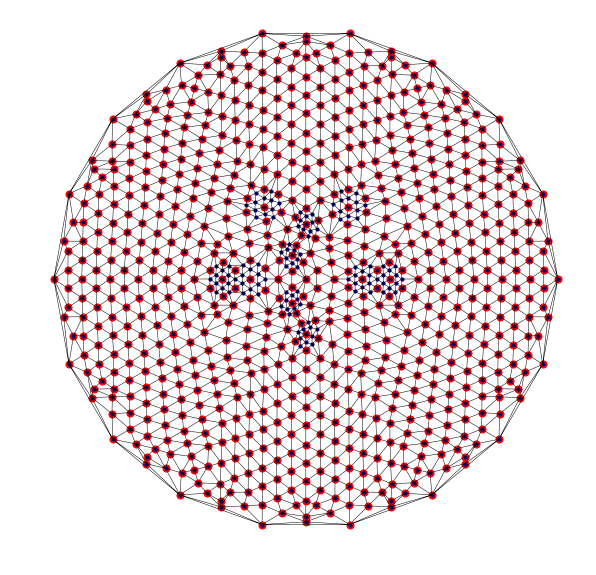

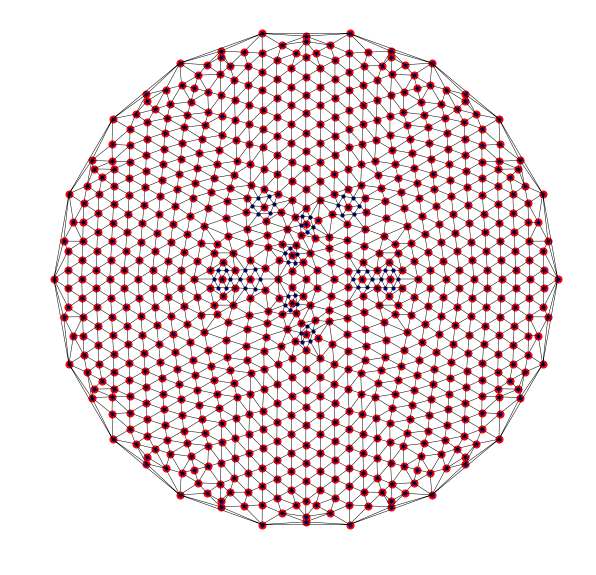

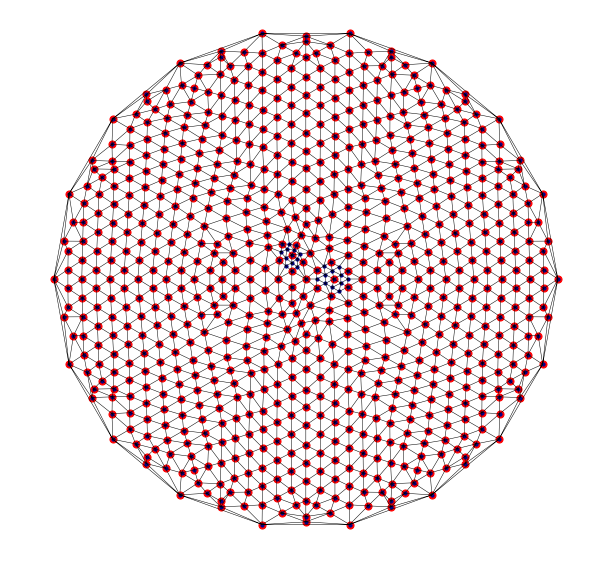

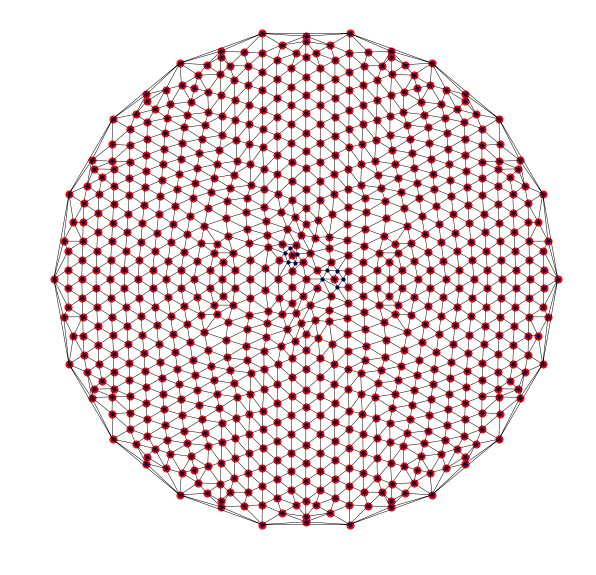

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


def mesh_fig(mesh, meshR, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111)
    ax.axis('off')

    generator = mesh
    refined   = meshR

    x0 = generator.x
    y0 = generator.y

    xR = refined.x
    yR = refined.y
    

    ax.scatter(x0, y0, color="Red", marker="o", s=50)
    ax.scatter(xR, yR, color="DarkBlue", marker="o", s=10)
    
    ax.triplot(xR, yR, refined.simplices, color="black", linewidth=0.5)

    fig.savefig(name, dpi=250, transparent=True)
    
    return


mesh_fig(ellip2,  ellip2mv,  "EdgeByVertex1to10" )
mesh_fig(ellip2,  ellip2ev,  "EdgeByVertexT1to10" )
mesh_fig(ellip2,  ellip2cv,  "CentroidByVertexT1to10" )
mesh_fig(ellip2,  ellip2et,  "EdgeByTriangle1to10" )
mesh_fig(ellip2,  ellip2ct,  "CentroidByTriangle1to10" )



### Targetted refinement

Here we refine a triangulation to a specific criterion - resolving two points in distinct triangles or with distinct nearest neighbour vertices. 

In [5]:
points = np.array([[ 3.33, 3.33], [7.77, 7.77]]).T

In [6]:
triangulations = [ellip1]
nearest, distances = triangulations[-1].nearest_vertex(points[:,0], points[:,1])

max_depth = 10

while nearest[0] == nearest[1] and max_depth > 0:

    xs, ys = triangulations[-1].centroid_refine_triangulation_by_vertices(vertices=nearest[0])
    new_triangulation = stripy.Triangulation(xs, ys)
    nearest, distances = new_triangulation.nearest_vertex(points[:,0], points[:,1])
    triangulations.append(new_triangulation)
    
    max_depth -= 1

print("refinement_steps = {}".format(len(triangulations)))

centroid_triangulations = triangulations[:]

refinement_steps = 11


In [7]:
triangulations = [ellip1]
nearest, distances = triangulations[-1].nearest_vertex(points[:,0], points[:,1])

max_depth = 10

while nearest[0] == nearest[1] and max_depth > 0:

    xs, ys = triangulations[-1].edge_refine_triangulation_by_vertices(vertices=nearest[0])
    new_triangulation = stripy.Triangulation(xs, ys)
    nearest, distances = new_triangulation.nearest_vertex(points[:,0], points[:,1])
    triangulations.append(new_triangulation)
    
    max_depth -= 1

print("refinement_steps = {}".format(len(triangulations)))

edge_triangulations = triangulations[:]

refinement_steps = 11


In [8]:
triangulations = [ellip1]

in_triangle = triangulations[-1].containing_triangle(points[:,0], points[:,1])

max_depth = 10

while in_triangle[0] == in_triangle[1] and max_depth > 0:

    xs, ys = triangulations[-1].edge_refine_triangulation_by_triangles(in_triangle[0])
    new_triangulation = stripy.Triangulation(xs, ys)
    in_triangle = new_triangulation.containing_triangle(points[:,0], points[:,1])
    triangulations.append(new_triangulation)
    
    print(in_triangle)


    
    if in_triangle.shape[0] == 0:
        break
    
    max_depth -= 1

print("refinement_steps = {}".format(len(triangulations)))

edge_t_triangulations = triangulations[:]

[435 435]
[496 496]
[503 503]
[509 509]
[515 515]
[521 521]
[525 525]
[532 532]
[535 535]
[537 537]
refinement_steps = 11


In [9]:
triangulations = [ellip1]

in_triangle = triangulations[-1].containing_triangle(points[:,0], points[:,1])

max_depth = 10

while in_triangle[0] == in_triangle[1] and max_depth > 0:

    xs, ys = triangulations[-1].centroid_refine_triangulation_by_triangles(in_triangle[0])
    new_triangulation = stripy.Triangulation(xs, ys)
    in_triangle = new_triangulation.containing_triangle(points[:,0], points[:,1])
    triangulations.append(new_triangulation)
    
    print(in_triangle)
    
    if in_triangle.shape[0] == 0:
        break
    
    max_depth -= 1

print("refinement_steps = {}".format(len(triangulations)))

centroid_t_triangulations = triangulations[:]

[418 418]
[434 434]
[435 435]
[123 123]
[494 494]
[496 496]
[497 497]
[499 499]
[503 503]
[503 503]
refinement_steps = 11


### Visualisation of targetted refinement

EdgeByVertex       --- 714 simplices,  equant max = 4.20,  equant min = 1.00,  size ratio = 1341.99
EdgeByTriangle     --- 546 simplices,  equant max = 2.72,  equant min = 1.00,  size ratio = 1341.99
CentroidByVertex   --- 600 simplices,  equant max = 3.78,  equant min = 1.00,  size ratio = 317.88
CentroidByTriangle --- 506 simplices,  equant max = 2.72,  equant min = 1.00,  size ratio = 68.22


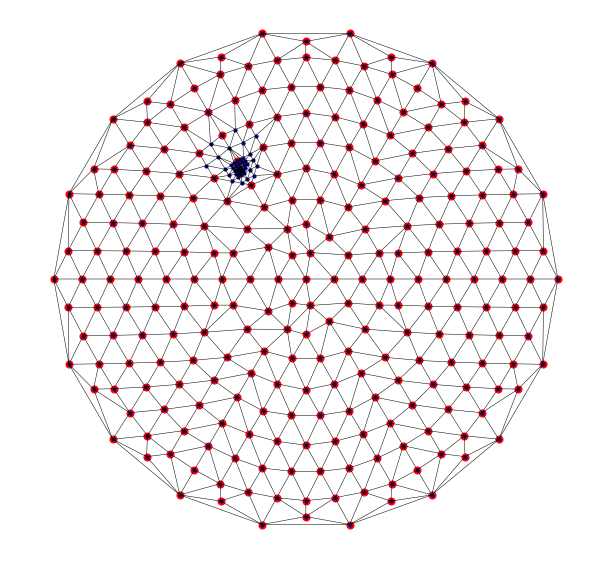

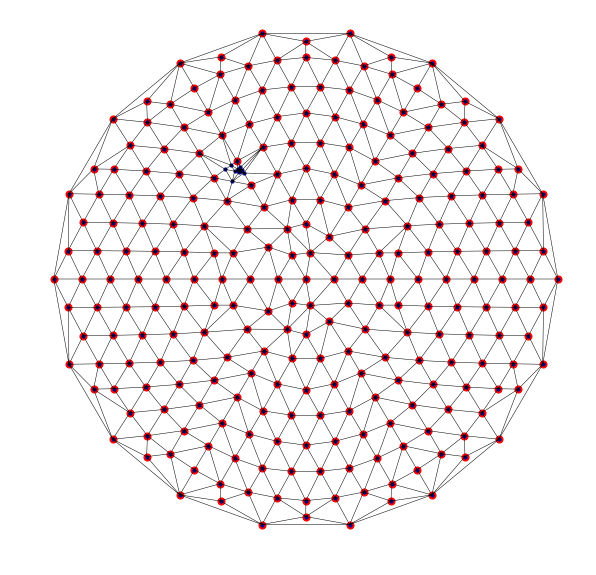

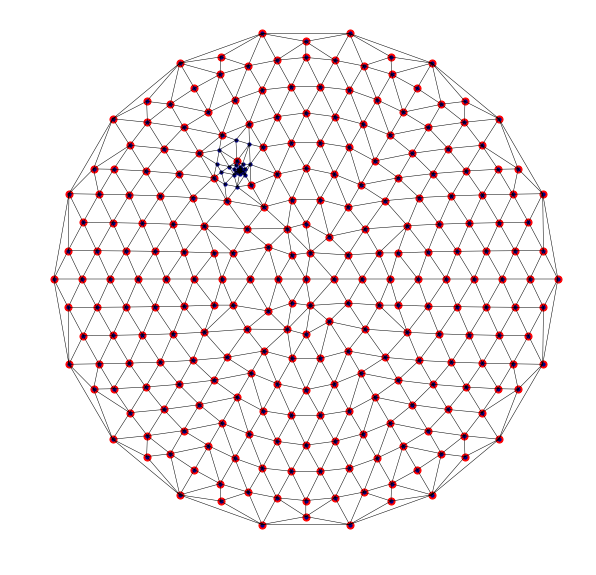

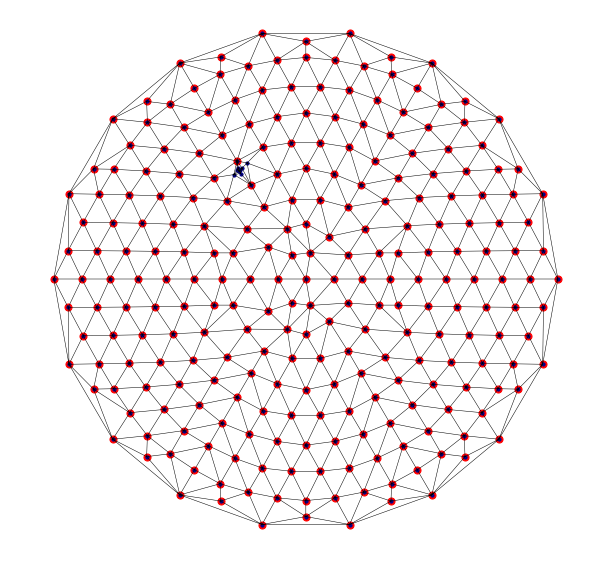

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

str_fmt = "{:18} --- {} simplices,  equant max = {:.2f},  equant min = {:.2f},  size ratio = {:.2f}"


mesh_fig(edge_triangulations[0],        edge_triangulations[-1],     "EdgeByVertex" )

T = edge_triangulations[-1]
E = np.array(T.edge_lengths()).T
A = np.array(T.areas()).T
equant = np.max(E, axis=1) / np.min(E, axis=1)
size_ratio = np.sqrt(np.max(A) / np.min(A))
print(str_fmt.format("EdgeByVertex", T.simplices.shape[0], equant.max(), equant.min(), size_ratio))


mesh_fig(edge_t_triangulations[0],      edge_t_triangulations[-1],     "EdgeByTriangle" )

T = edge_t_triangulations[-1]
E = np.array(T.edge_lengths()).T
A = np.array(T.areas()).T
equant = np.max(E, axis=1) / np.min(E, axis=1)
size_ratio = np.sqrt(np.max(A) / np.min(A))
print(str_fmt.format("EdgeByTriangle", T.simplices.shape[0], equant.max(), equant.min(), size_ratio))


mesh_fig(centroid_triangulations[0],    centroid_triangulations[-1],   "CentroidByVertex" )

T = centroid_triangulations[-1]
E = np.array(T.edge_lengths()).T
A = np.array(T.areas()).T
equant = np.max(E, axis=1) / np.min(E, axis=1)
size_ratio = np.sqrt(np.max(A) / np.min(A))
print(str_fmt.format("CentroidByVertex", T.simplices.shape[0], equant.max(), equant.min(), size_ratio))



mesh_fig(centroid_t_triangulations[0],  centroid_t_triangulations[-1], "CentroidByTriangle" )

T = centroid_t_triangulations[-1]
E = np.array(T.edge_lengths()).T
A = np.array(T.areas()).T
equant = np.max(E, axis=1) / np.min(E, axis=1)
size_ratio = np.sqrt(np.max(A) / np.min(A))
print(str_fmt.format("CentroidByTriangle", T.simplices.shape[0], equant.max(), equant.min(), size_ratio))
